# Read the data set from the file “caso_full.txt” and perform the following tasks: 

## Plot new cases of COVID-19 by notification date

import pyqtgraph as pg
import pyspedas
import pandas as pd

In [1]:
import pandas as pd
df = pd.read_csv('caso_full.txt', sep=',', parse_dates=['date'])
df.date = pd.to_datetime(df['date'])
# df = df.set_index('date')
df

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,São Paulo,3550308.0,2020-02-25,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-25,0.0000,0,1,city,SP,1,0
1,NaN,35.0,2020-02-25,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-25,0.0000,0,1,state,SP,1,0
2,São Paulo,3550308.0,2020-02-26,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-26,0.0000,0,2,city,SP,0,0
3,NaN,35.0,2020-02-26,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-26,0.0000,0,2,state,SP,0,0
4,São Paulo,3550308.0,2020-02-27,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-27,0.0000,0,3,city,SP,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,Nova Prata,4313300.0,2020-11-13,46,27648.0,27257.0,False,False,945,3417.96875,2020-11-13,0.0074,7,204,city,RS,1,0
1048571,Nova Pádua,4313086.0,2020-11-13,46,2558.0,2553.0,False,False,68,2658.32682,2020-11-13,0.0147,1,151,city,RS,1,0
1048572,Nova Ramada,4313334.0,2020-11-13,46,2218.0,2242.0,False,False,32,1442.74121,2020-11-13,0.0000,0,91,city,RS,4,0
1048573,Nova Roma do Sul,4313359.0,2020-11-13,46,3717.0,3689.0,False,False,64,1721.81867,2020-11-13,0.0000,0,151,city,RS,0,0


In [2]:
# taking the aggregate record of each state, thereby dropping the city values to avoid repetition
df_s = df[df.place_type == 'state']
df_s

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
1,NaN,35.0,2020-02-25,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-25,0.0000,0,1,state,SP,1,0
3,NaN,35.0,2020-02-26,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-26,0.0000,0,2,state,SP,0,0
5,NaN,35.0,2020-02-27,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-27,0.0000,0,3,state,SP,0,0
7,NaN,35.0,2020-02-28,9,46289333.0,45919049.0,False,False,2,0.00432,2020-02-28,0.0000,0,4,state,SP,1,0
9,NaN,35.0,2020-02-29,9,46289333.0,45919049.0,False,False,2,0.00432,2020-02-29,0.0000,0,5,state,SP,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044353,NaN,43.0,2020-11-12,46,11422973.0,11377239.0,False,False,271340,2375.38861,2020-11-12,0.0226,6125,248,state,RS,3590,91
1044354,NaN,42.0,2020-11-12,46,7252502.0,7164788.0,False,False,284982,3929.43015,2020-11-12,0.0115,3282,246,state,SC,1730,14
1044355,NaN,28.0,2020-11-12,46,2318822.0,2298696.0,False,False,85804,3700.32715,2020-11-12,0.0262,2250,244,state,SE,161,3
1044356,NaN,35.0,2020-11-12,46,46289333.0,45919049.0,False,False,1156652,2498.74415,2020-11-12,0.0348,40202,262,state,SP,5780,295


In [3]:
# summing up the rmultiple data that belongs to a single date
df_s_d = df_s.groupby(['date']).sum()
df_s_d

,city_ibge_code,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_death_rate,last_available_deaths,order_for_place,new_confirmed,new_deaths
date,,,,,,,,,,,,,
2020-02-25,35.0,9,46289333.0,45919049.0,0,0,1,0.00216,0.0000,0,1,1,0
2020-02-26,35.0,9,46289333.0,45919049.0,0,0,1,0.00216,0.0000,0,2,0,0
2020-02-27,35.0,9,46289333.0,45919049.0,0,0,1,0.00216,0.0000,0,3,0,0
2020-02-28,35.0,9,46289333.0,45919049.0,0,0,2,0.00432,0.0000,0,4,1,0
2020-02-29,35.0,9,46289333.0,45919049.0,0,0,2,0.00432,0.0000,0,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-08,786.0,1242,211755692.0,210147125.0,0,1,5666389,96338.23054,0.6890,162538,6511,10502,190
2020-11-09,786.0,1242,211755692.0,210147125.0,0,1,5679803,96615.01757,0.6884,162724,6538,13414,186
2020-11-10,786.0,1242,211755692.0,210147125.0,0,0,5726227,97110.46332,0.6861,162922,6565,46424,198


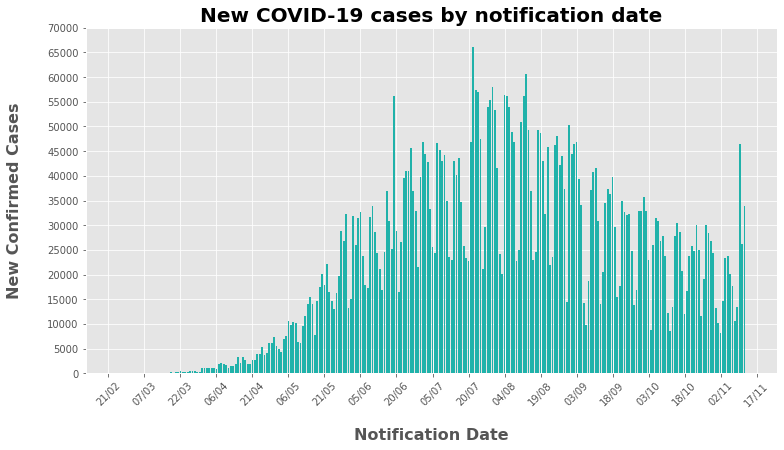

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import numpy as np
params = {'tex.usetex': True}
plt.style.use('ggplot')

fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
plt.rcParams['figure.figsize'] = [8,6]
plt.rcParams["font.weight"] = "bold"

plot1 = ax.bar(df_s_d.index, df_s_d['new_confirmed'], color='lightseagreen')

ax.set_title('New COVID-19 cases by notification date', size=20, weight='bold')
plt.xlabel('Notification Date', fontsize=16, labelpad=20., weight='bold')
plt.ylabel('New Confirmed Cases', fontsize=16, labelpad=25., weight='bold')

# date formatting
ax.xaxis.set_major_formatter(dates.DateFormatter('%d/%m'))
ax.xaxis.set_major_locator(dates.DayLocator(interval=15))
fig.autofmt_xdate(rotation = 45, ha = 'center')

plt.yticks(np.arange(df_s_d['new_confirmed'].min(), df_s_d['new_confirmed'].max()+5000, 5000))
# plt.xlim([df_s_d.index.min(), df_s_d.index.max()])


plt.savefig('New COVID-19 cases by notification date1.png', bbox_inches='tight')
plt.show()

## Plot the new cases of COVID-19 by Epidemiological Week of notification

In [5]:
# supping up over multiple values for a single week
df_s_e = df_s.groupby(['epidemiological_week']).sum()
# df_s_e

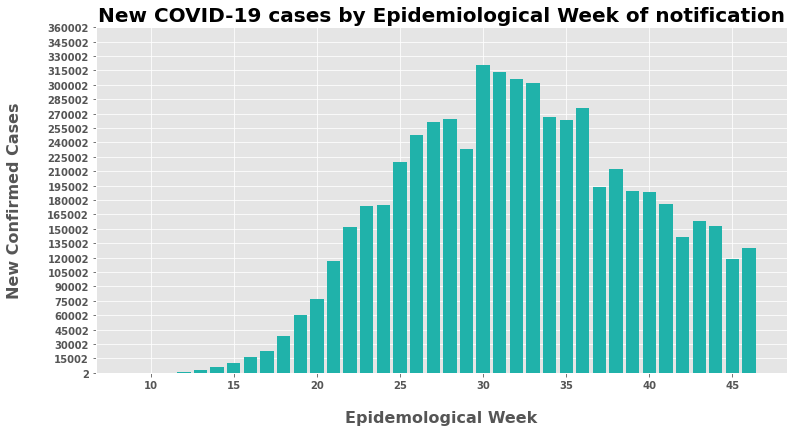

In [6]:
df_s_e = df_s.groupby(['epidemiological_week']).sum()

fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

plt.rcParams['figure.figsize'] = [8,6]
plt.rcParams["font.weight"] = "bold"

plot1 = ax.bar(df_s_e.index, df_s_e['new_confirmed'], color='lightseagreen')

ax.set_title('New COVID-19 cases by Epidemiological Week of notification', size=20, weight='bold')
plt.xlabel('Epidemological Week', fontsize=16, labelpad=20., weight='bold')
plt.ylabel('New Confirmed Cases', fontsize=16, labelpad=25., weight='bold')


plt.yticks(np.arange(df_s_e['new_confirmed'].min(), df_s_e['new_confirmed'].max()+50000, 15000))
# plt.xlim([df_s_e.index.min(), df_s_e.index.max()])


plt.savefig('New COVID-19 cases by Epidemiological Week1.png', bbox_inches='tight')
plt.show()

## Plot the accumulated cases of COVID-19 by notification date

In [7]:
# summing up over date
df_s_d = df_s.groupby(['date']).sum()

In [8]:
import matplotlib.pyplot as plt
params = {'tex.usetex': True}
plt.style.use('ggplot')

a_sum = 0
list_accumulate = []

# confirming if the column 'last_available_confirmed' is the right column for accumulating values
for value in df_s_d['new_confirmed']:
    a_sum += value
    list_accumulate.append(a_sum)
    
df_s_d['new_confirmed_accumulate'] = list_accumulate
df_s_d

# column 'last_available_confirmed' and the newly created column is similar

,city_ibge_code,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_death_rate,last_available_deaths,order_for_place,new_confirmed,new_deaths,new_confirmed_accumulate
date,,,,,,,,,,,,,,
2020-02-25,35.0,9,46289333.0,45919049.0,0,0,1,0.00216,0.0000,0,1,1,0,1
2020-02-26,35.0,9,46289333.0,45919049.0,0,0,1,0.00216,0.0000,0,2,0,0,1
2020-02-27,35.0,9,46289333.0,45919049.0,0,0,1,0.00216,0.0000,0,3,0,0,1
2020-02-28,35.0,9,46289333.0,45919049.0,0,0,2,0.00432,0.0000,0,4,1,0,2
2020-02-29,35.0,9,46289333.0,45919049.0,0,0,2,0.00432,0.0000,0,5,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-08,786.0,1242,211755692.0,210147125.0,0,1,5666389,96338.23054,0.6890,162538,6511,10502,190,5666389
2020-11-09,786.0,1242,211755692.0,210147125.0,0,1,5679803,96615.01757,0.6884,162724,6538,13414,186,5679803
2020-11-10,786.0,1242,211755692.0,210147125.0,0,0,5726227,97110.46332,0.6861,162922,6565,46424,198,5726227


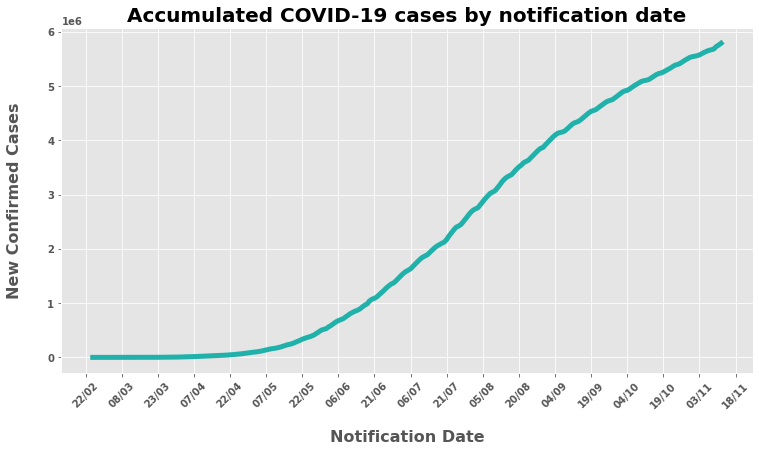

In [9]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
plt.rcParams['figure.figsize'] = [8,6]
plt.rcParams["font.weight"] = "bold"

plot1 = ax.plot(df_s_d.index, df_s_d['last_available_confirmed'], color='lightseagreen', lw=5)

ax.set_title('Accumulated COVID-19 cases by notification date', size=20, weight='bold')
plt.xlabel('Notification Date', fontsize=16, labelpad=20., weight='bold')
plt.ylabel('New Confirmed Cases', fontsize=16, labelpad=25., weight='bold')

# date formatting
ax.xaxis.set_major_formatter(dates.DateFormatter('%d/%m'))
ax.xaxis.set_major_locator(dates.DayLocator(interval=15))
fig.autofmt_xdate(rotation = 45, ha = 'center')

plt.yticks(np.arange(df_s_d['last_available_confirmed'].min(), df_s_d['last_available_confirmed'].max()+500000,\
                     1000000))

plt.savefig('Accumulated cases of COVID-19 by notification date.png', bbox_inches='tight')
plt.show()

## Plot the accumulated cases of COVID-19 by Epidemiological Week of notification

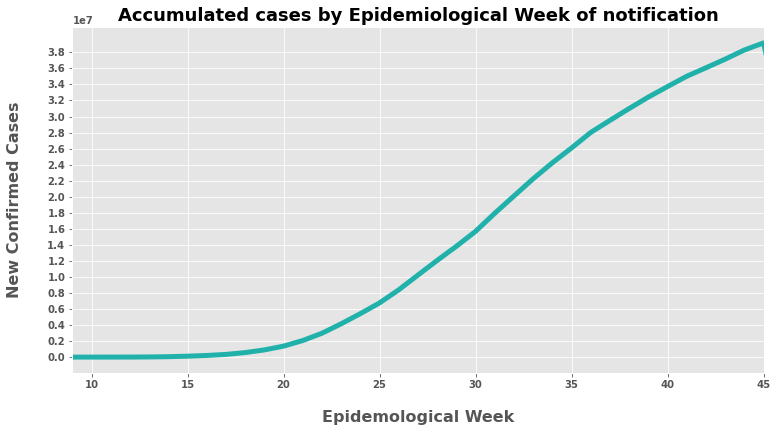

In [10]:
df_s_e = df_s.groupby(['epidemiological_week']).sum()

fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
plt.rcParams['figure.figsize'] = [8,6]
plt.rcParams["font.weight"] = "bold"

plot1 = ax.plot(df_s_e.index, df_s_e['last_available_confirmed'], color='lightseagreen', lw=5)

ax.set_title('Accumulated cases by Epidemiological Week of notification', size=18, weight='bold')
plt.xlabel('Epidemological Week', fontsize=16, labelpad=20., weight='bold')
plt.ylabel('New Confirmed Cases', fontsize=16, labelpad=25., weight='bold')


plt.yticks(np.arange(df_s_e['last_available_confirmed'].min(), df_s_e['last_available_confirmed'].max()+500000,\
                     2000000))
plt.xlim([df_s_e.index.min(), 45])


plt.savefig('Accumulated cases by Epidemiological Week.png', bbox_inches='tight')

plt.show()

## Plot the accumulated cases of COVID-19 by notification date by state

In [11]:
# creating a pivot table that sets the date to be index, states to be columns and covid cases to be values
df_s_d4 = df_s.pivot(index='date', columns='state', values='last_available_confirmed')
df_s_d4

state,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
date,,,,,,,,,,,,,,,,,,,,,
2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2020-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
2020-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-08,31707.0,91718.0,165664.0,53010.0,363146.0,278350.0,216389.0,162428.0,261452.0,187652.0,...,221268.0,316170.0,82939.0,73311.0,59195.0,260898.0,274621.0,85377.0,1125936.0,76860.0
2020-11-09,31788.0,91848.0,165969.0,53330.0,363986.0,278986.0,216861.0,163072.0,262722.0,187919.0,...,222831.0,316575.0,83220.0,73490.0,59273.0,261656.0,275655.0,85477.0,1125936.0,77095.0
2020-11-10,31926.0,91939.0,166771.0,53574.0,365941.0,279322.0,217370.0,164659.0,264271.0,188313.0,...,223870.0,318953.0,83309.0,73688.0,59586.0,264576.0,280541.0,85574.0,1147451.0,77306.0


/tmp/ipykernel_70508/582589625.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


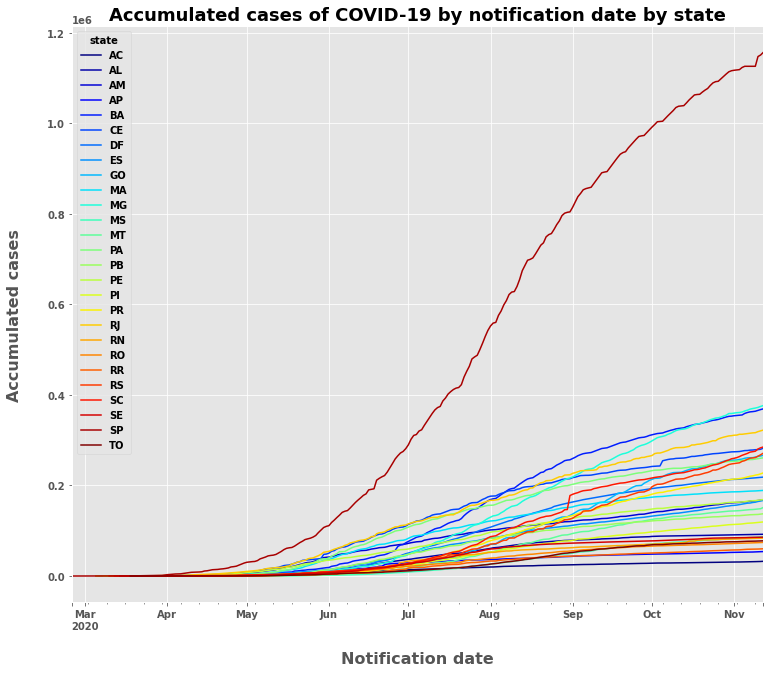

In [12]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
# plt.rcParams['figure.figsize'] = [8,6]
plt.rcParams["font.weight"] = "bold"

# df_s_d4 = df_s.pivot(index='date', columns='state', values='last_available_confirmed')
df_s_d4.plot(ax=ax, cmap='jet')
# sns.lineplot(x='date', y='state', data=df_s_d4, hue='color', ec=None)

ax.set_title('Accumulated cases of COVID-19 by notification date by state', size=18, weight='bold')
plt.xlabel('Notification date', fontsize=16, labelpad=20., weight='bold')
plt.ylabel('Accumulated cases', fontsize=16, labelpad=25., weight='bold')

fig.tight_layout()
plt.savefig('Accumulated cases of COVID-19 by notification date by state1.png', bbox_inches='tight')
plt.show()

## Plot the accumulated cases of COVID-19 by Epidemiological Week of notification by state

In [13]:
# creating a pivot table that sets the week to be index, states to be columns and covid cases to be values
# aggfunc sums over the multiple values that are in a week for a state
df_s_e1 = df_s.pivot_table(index='epidemiological_week', columns='state', values='last_available_confirmed',\
                           aggfunc=np.sum)
df_s_e1 

state,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
epidemiological_week,,,,,,,,,,,,,,,,,,,,,
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN
10,NaN,NaN,NaN,NaN,3.0,NaN,1.0,3.0,NaN,NaN,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,38.0,NaN
11,NaN,7.0,4.0,NaN,26.0,NaN,17.0,12.0,10.0,NaN,...,18.0,57.0,3.0,NaN,NaN,15.0,10.0,1.0,238.0,NaN
12,28.0,21.0,29.0,2.0,166.0,214.0,323.0,86.0,87.0,3.0,...,140.0,388.0,20.0,4.0,2.0,182.0,152.0,40.0,1699.0,5.0
13,145.0,73.0,418.0,14.0,646.0,1526.0,1313.0,302.0,251.0,64.0,...,649.0,2566.0,169.0,34.0,58.0,1034.0,881.0,99.0,6729.0,52.0
14,297.0,134.0,1466.0,97.0,1688.0,3553.0,2588.0,832.0,518.0,434.0,...,1692.0,6109.0,816.0,63.0,183.0,2319.0,1836.0,158.0,20308.0,86.0
15,410.0,260.0,5318.0,698.0,3639.0,9258.0,3640.0,1935.0,1105.0,1839.0,...,3936.0,13768.0,1820.0,175.0,402.0,4034.0,3896.0,265.0,45991.0,149.0
16,759.0,592.0,10944.0,2268.0,6288.0,16264.0,4877.0,5170.0,2081.0,5290.0,...,5829.0,26065.0,3054.0,556.0,1039.0,5308.0,6202.0,365.0,76367.0,204.0
17,1467.0,2021.0,18670.0,3701.0,11715.0,30079.0,6607.0,9900.0,3100.0,12356.0,...,7524.0,39714.0,4917.0,1673.0,2118.0,6962.0,7908.0,847.0,114716.0,293.0


/tmp/ipykernel_70508/2107957180.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


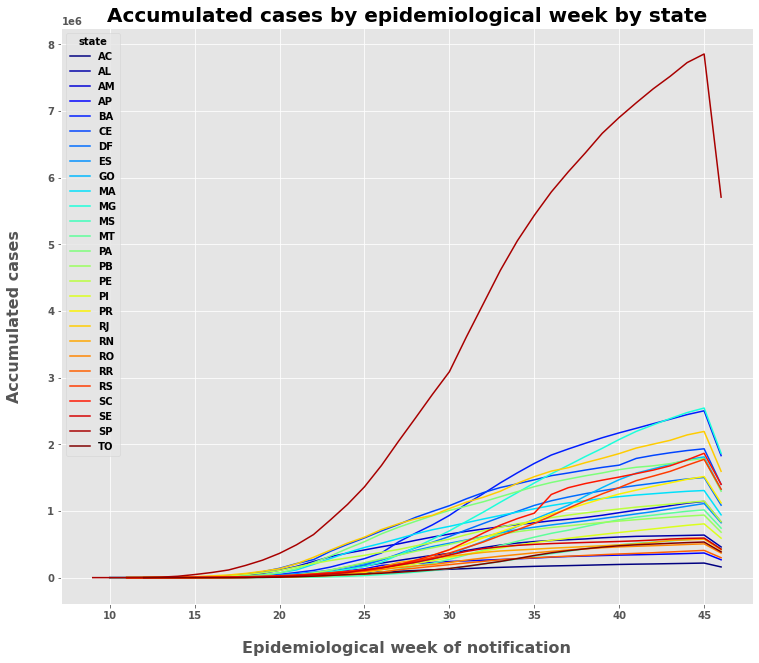

In [14]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
plt.rcParams["font.weight"] = "bold"

# plot
df_s_e1.plot(ax=ax, cmap='jet')

ax.set_title('Accumulated cases by epidemiological week by state', size=20, weight='bold')
plt.xlabel('Epidemiological week of notification', fontsize=16, labelpad=20., weight='bold')
plt.ylabel('Accumulated cases', fontsize=16, labelpad=25., weight='bold')

fig.tight_layout()
plt.savefig('Accumulated cases of COVID-19 by epidemiological week by state1.png', bbox_inches='tight')
plt.show()

## Plot the COVID-19 cases map by notification. Consider notifications by cities.

pip install --upgrade pyodbc

import pyodbc

conn = pyodbc.connect(r'Driver={Microsoft Access Driver (*.mdb, *.accdb)};DBQ=BR_Localidades_2010_v1.accdb;')
cursor = conn.cursor()
cursor.execute('select * from table name')
   
for row in cursor.fetchall():
    print (row)

**Tried several methods to open and read the mdb file, but was not accessible. I guess it has to do with Linux**

**I will be using a table of ibge code gotten from Sophia**

In [15]:
import pandas as pd
# reading the csv file containing the long and lat info with the cities' ibge
ibge = pd.read_csv('municipios.csv')
ibge = ibge.sort_values('codigo_ibge')
ibge

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf,siafi_id,ddd,fuso_horario
131,1100015,Alta Floresta D'Oeste,-11.92830,-61.9953,0,11,33,69,America/Porto_Velho
381,1100023,Ariquemes,-9.90571,-63.0325,0,11,7,69,America/Porto_Velho
826,1100031,Cabixi,-13.49450,-60.5520,0,11,37,69,America/Porto_Velho
863,1100049,Cacoal,-11.43430,-61.4562,0,11,9,69,America/Porto_Velho
1224,1100056,Cerejeiras,-13.18700,-60.8168,0,11,27,69,America/Porto_Velho
...,...,...,...,...,...,...,...,...,...
5488,5222005,Vianópolis,-16.74050,-48.5159,0,52,9641,62,America/Sao_Paulo
5492,5222054,Vicentinópolis,-17.73220,-49.8047,0,52,9657,64,America/Sao_Paulo
5504,5222203,Vila Boa,-15.03870,-47.0520,0,52,67,61,America/Sao_Paulo
5513,5222302,Vila Propício,-15.45420,-48.8819,0,52,1068,62,America/Sao_Paulo


In [16]:
# picking the city values only, leaving out the states aggregate values.
df_c = df[df.place_type == 'city']

# summing up over cities' cases with thesame ibge_code
df_c2 = df_c.groupby(['city_ibge_code']).sum()
df_c2 = df_c2.reset_index()
df_c2 = df_c2.sort_values('city_ibge_code')
df_c2

,city_ibge_code,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_death_rate,last_available_deaths,order_for_place,new_confirmed,new_deaths
0,1100015.0,6342,4454688.0,4497220.0,0,22,79156,348275.25517,1.4374,948,19306,922,12
1,1100023.0,6711,23876014.0,23514134.0,0,24,605527,552876.56471,2.8493,9949,23871,6046,101
2,1100031.0,6342,1016848.0,1041152.0,0,22,11604,223670.00777,8.4474,555,19306,137,5
3,1100049.0,6378,17006814.0,16901082.0,0,22,231407,269413.10693,2.3289,3311,19701,2640,37
4,1100056.0,5946,2851904.0,2872848.0,0,21,26126,161231.79461,18.1411,802,15576,277,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5564,5222005.0,6756,3088917.0,3063723.0,0,3,19573,140037.20390,1.7414,273,24531,205,4
5565,5222054.0,5517,1393061.0,1372651.0,0,0,14747,166200.83410,29.1927,606,12403,192,7
5566,5222203.0,5346,946800.0,925650.0,0,0,5682,90019.01150,0.8449,51,11325,62,2
5567,5222302.0,5010,805834.0,797477.0,0,0,18107,307837.47006,3.3210,239,9453,245,2


In [17]:
# comparing the ibge codes imported and that in the original dataframe, picking only the ones absent in both

# missing_ibges = []
# for i in range(len(ibge['codigo_ibge'])):
#     for j in range(len(df_c2)):
#         if ibge['codigo_ibge'][i] == df_c2['city_ibge_code'][j]:
#             if i not in missing_ibges:
#                 missing_ibges.append(i)

In [18]:
# print('The missing index is ',set(range(missing_ibges[len(missing_ibges)-1])[1:]) - set(missing_ibges))
# # result is 1213

# printing the ibge code if index 1213
ibge['codigo_ibge'][1213]

# removing the row that contains 3115607
ibge = ibge[ibge.codigo_ibge != 3115607]
ibge

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf,siafi_id,ddd,fuso_horario
131,1100015,Alta Floresta D'Oeste,-11.92830,-61.9953,0,11,33,69,America/Porto_Velho
381,1100023,Ariquemes,-9.90571,-63.0325,0,11,7,69,America/Porto_Velho
826,1100031,Cabixi,-13.49450,-60.5520,0,11,37,69,America/Porto_Velho
863,1100049,Cacoal,-11.43430,-61.4562,0,11,9,69,America/Porto_Velho
1224,1100056,Cerejeiras,-13.18700,-60.8168,0,11,27,69,America/Porto_Velho
...,...,...,...,...,...,...,...,...,...
5488,5222005,Vianópolis,-16.74050,-48.5159,0,52,9641,62,America/Sao_Paulo
5492,5222054,Vicentinópolis,-17.73220,-49.8047,0,52,9657,64,America/Sao_Paulo
5504,5222203,Vila Boa,-15.03870,-47.0520,0,52,67,61,America/Sao_Paulo
5513,5222302,Vila Propício,-15.45420,-48.8819,0,52,1068,62,America/Sao_Paulo


In [19]:
# creating a new dataframe containing the necessary parameters
final_df = ibge[['latitude', 'longitude', 'nome', 'codigo_ibge']].copy()
final_df['last_available_confirmed'] = df_c2['last_available_confirmed']

# Sorting data in descending order to plot first the higher values, that is, the biggest scatter points first
final_df = final_df.sort_values(by="last_available_confirmed", ascending=False, key=abs)
final_df

,latitude,longitude,nome,codigo_ibge,last_available_confirmed
3828,-20.50890,-44.4783,Piracema,3150604,37979790.0
5568,-3.27014,-45.6553,Zé Doca,2114007,19440708.0
3241,-22.11580,-45.5123,Natércia,3144409,14362360.0
2162,-24.71530,-53.0827,Iguatu,4110052,10735005.0
949,-13.78700,-48.5704,Campinaçu,5204656,7892599.0
...,...,...,...,...,...
3082,-27.49700,-53.6891,Miraguaí,4312302,33.0
4703,-22.80580,-43.3729,São João de Meriti,3305109,28.0
3007,-3.09849,-45.0350,Matinha,2106508,8.0
2819,-22.75500,-51.6601,Lupionópolis,4113809,1.0


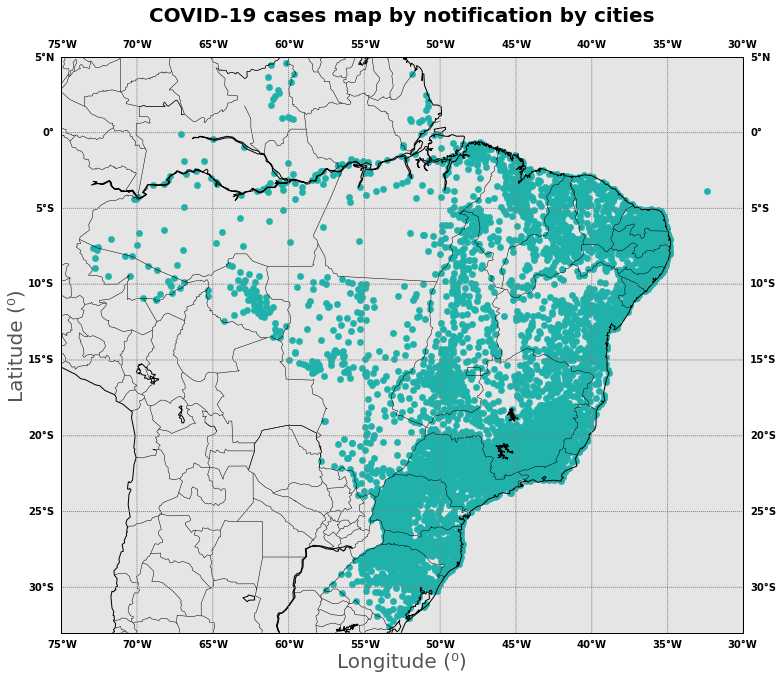

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

fig = plt.figure(figsize=(12,10))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# map plot
m = Basemap(projection='cyl',llcrnrlat=-33,urcrnrlat=5, llcrnrlon=-75,urcrnrlon=-30,resolution='l')

m.drawcoastlines()
m.drawcountries()
m.drawstates()

# plotting the points
cmm = plt.scatter(final_df['longitude'], final_df['latitude'], c='lightseagreen', s=40)

# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,5.), color='gray', labels=[1,1,0,0]) #the latitudinal lines
m.drawmeridians(np.arange(-180.,181.,5.), color='gray', labels=[0,0,1,1]) #the longitudinal lines
m.drawmapboundary()

ax.set_title('COVID-19 cases map by notification by cities', size=20, pad=35., weight='bold')
plt.xlabel('Longitude (⁰)', fontsize=20, labelpad=20.)
plt.ylabel('Latitude (⁰)',  fontsize=20, labelpad=35.)

plt.savefig('COVID-19 cases map by notification by cities.png', bbox_inches='tight')
plt.show()

pip install plotly==5.4.0

pip install "jupyterlab>=3" "ipywidgets>=7.6"

pip install jupyter-dash

import plotly.express as px
df = final_df
fig = px.scatter_geo(df, lat='latitude', lon='longitude', size='last_available_confirmed', locations="last_available_confirmed",
                     hover_name="nome", projection="natural earth", size_max=20)

fig.show()

# For item (a) of the previous question, plot a moving averege, a smooth, a TS_SMOOTH and a SAVGOL over the data

## A weighted moving average for 1a

In [21]:
# using the pandas in-built rolling function of windowsize 5
import numpy as np

ws  = 15
ws2 = 5
weight  = np.arange(1,  ws+1)
weight2 = np.arange(1, ws2+1)
#weight array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
s  =  weight.sum()
s2 = weight2.sum()
# weighted moving average
df_s_d = df_s.groupby(['date']).sum()
# creating a new column containing the weighted moving average
df_s_d['WMA_new_confirmed1'] = df_s_d.iloc[:,11].rolling(window=ws).apply(lambda new_confirmed: 
                                                                np.dot(new_confirmed, weight)/s, raw=True) 
df_s_d['WMA_new_confirmed2'] = df_s_d.iloc[:,11].rolling(window=ws2).apply(lambda new_confirmed: 
                                                                np.dot(new_confirmed, weight2)/s2, raw=True) 
df_s_d

,city_ibge_code,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_death_rate,last_available_deaths,order_for_place,new_confirmed,new_deaths,WMA_new_confirmed1,WMA_new_confirmed2
date,,,,,,,,,,,,,,,
2020-02-25,35.0,9,46289333.0,45919049.0,0,0,1,0.00216,0.0000,0,1,1,0,NaN,NaN
2020-02-26,35.0,9,46289333.0,45919049.0,0,0,1,0.00216,0.0000,0,2,0,0,NaN,NaN
2020-02-27,35.0,9,46289333.0,45919049.0,0,0,1,0.00216,0.0000,0,3,0,0,NaN,NaN
2020-02-28,35.0,9,46289333.0,45919049.0,0,0,2,0.00432,0.0000,0,4,1,0,NaN,NaN
2020-02-29,35.0,9,46289333.0,45919049.0,0,0,2,0.00432,0.0000,0,5,0,0,NaN,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-08,786.0,1242,211755692.0,210147125.0,0,1,5666389,96338.23054,0.6890,162538,6511,10502,190,17816.050000,17006.400000
2020-11-09,786.0,1242,211755692.0,210147125.0,0,1,5679803,96615.01757,0.6884,162724,6538,13414,186,17142.391667,15103.933333
2020-11-10,786.0,1242,211755692.0,210147125.0,0,0,5726227,97110.46332,0.6861,162922,6565,46424,198,20580.675000,24864.933333


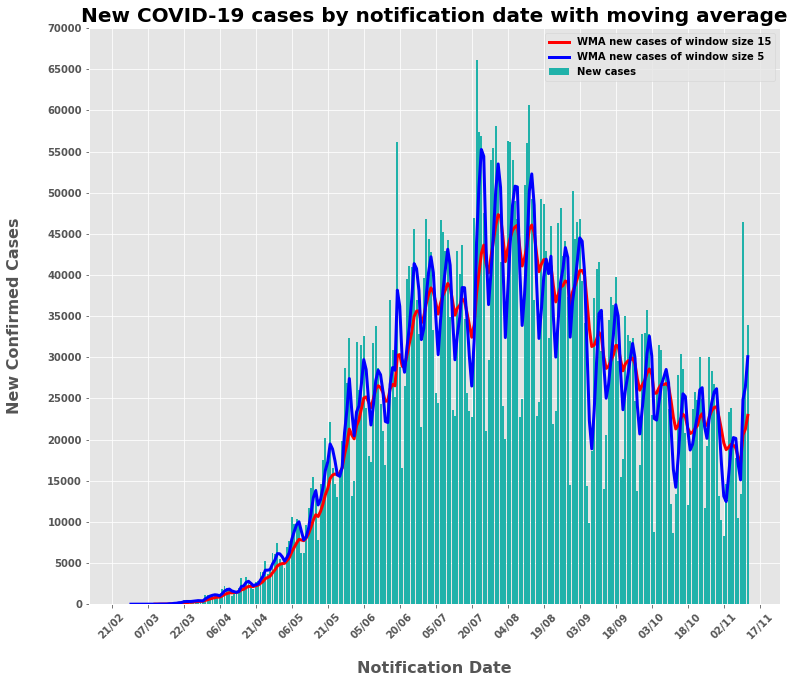

In [22]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

plt.bar(df_s_d.index, df_s_d['new_confirmed'], color='lightseagreen', label='New cases')
#plot of the moving average
plt.plot(df_s_d.index, df_s_d['WMA_new_confirmed1'], color='red', label='WMA new cases of window size 15', lw=3)
plt.plot(df_s_d.index, df_s_d['WMA_new_confirmed2'], color='blue', label='WMA new cases of window size 5', lw=3)

ax.set_title('New COVID-19 cases by notification date with moving average', size=20, weight='bold')
plt.xlabel('Notification Date', fontsize=16, labelpad=20., weight='bold')
plt.ylabel('New Confirmed Cases', fontsize=16, labelpad=25., weight='bold')

# date formatting
ax.xaxis.set_major_formatter(dates.DateFormatter('%d/%m'))
ax.xaxis.set_major_locator(dates.DayLocator(interval=15))
fig.autofmt_xdate(rotation = 45, ha = 'center')

plt.yticks(np.arange(df_s_d['new_confirmed'].min(), df_s_d['new_confirmed'].max()+5000, 5000))
plt.legend()

plt.savefig('New COVID-19 cases by notification date with moving average.png', bbox_inches='tight')
plt.show()


## Savitzky-golay smoothing over 1a

In [23]:
from scipy.signal import savgol_filter
# a new column
df_s_d['sav_gol'] = savgol_filter(df_s_d['new_confirmed'], 15, 3)
df_s_d

,city_ibge_code,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_death_rate,last_available_deaths,order_for_place,new_confirmed,new_deaths,WMA_new_confirmed1,WMA_new_confirmed2,sav_gol
date,,,,,,,,,,,,,,,,
2020-02-25,35.0,9,46289333.0,45919049.0,0,0,1,0.00216,0.0000,0,1,1,0,NaN,NaN,1.560784
2020-02-26,35.0,9,46289333.0,45919049.0,0,0,1,0.00216,0.0000,0,2,0,0,NaN,NaN,0.243557
2020-02-27,35.0,9,46289333.0,45919049.0,0,0,1,0.00216,0.0000,0,3,0,0,NaN,NaN,-0.453114
2020-02-28,35.0,9,46289333.0,45919049.0,0,0,2,0.00432,0.0000,0,4,1,0,NaN,NaN,-0.630661
2020-02-29,35.0,9,46289333.0,45919049.0,0,0,2,0.00432,0.0000,0,5,0,0,NaN,0.333333,-0.390519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-08,786.0,1242,211755692.0,210147125.0,0,1,5666389,96338.23054,0.6890,162538,6511,10502,190,17816.050000,17006.400000,22171.494692
2020-11-09,786.0,1242,211755692.0,210147125.0,0,1,5679803,96615.01757,0.6884,162724,6538,13414,186,17142.391667,15103.933333,24972.131301
2020-11-10,786.0,1242,211755692.0,210147125.0,0,0,5726227,97110.46332,0.6861,162922,6565,46424,198,20580.675000,24864.933333,27894.493274


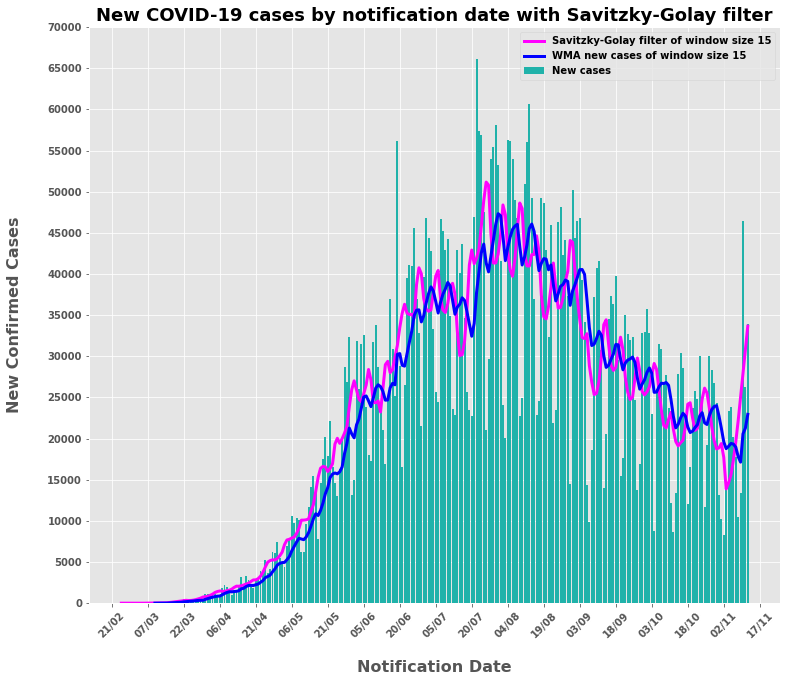

In [24]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax.bar(df_s_d.index, df_s_d['new_confirmed'], color='lightseagreen', label='New cases')
# plot of sav_gol
ax.plot(df_s_d.index, df_s_d['sav_gol'], color='magenta', label='Savitzky-Golay filter of window size 15', lw=3)
ax.plot(df_s_d.index, df_s_d['WMA_new_confirmed1'], color='blue', label='WMA new cases of window size 15', lw=3)

ax.set_title('New COVID-19 cases by notification date with Savitzky-Golay filter', size=18, weight='bold')
plt.xlabel('Notification Date', fontsize=16, labelpad=20., weight='bold')
plt.ylabel('New Confirmed Cases', fontsize=16, labelpad=25., weight='bold')

# date formatting
ax.xaxis.set_major_formatter(dates.DateFormatter('%d/%m'))
ax.xaxis.set_major_locator(dates.DayLocator(interval=15))
fig.autofmt_xdate(rotation = 45, ha = 'center')

plt.yticks(np.arange(df_s_d['new_confirmed'].min(), df_s_d['new_confirmed'].max()+5000, 5000))
plt.legend()

plt.savefig('New COVID-19 cases by notification date with Savitzky-Golay filter.png', bbox_inches='tight')
plt.show()

## numpy.convolve smoothing over 1a

Gives the discrete, linear convolution of two one-dimensional sequences. 

Not considered a good method.

pip install statsmodels

In [25]:
from statsmodels.nonparametric.kernel_regression import KernelReg
import numpy as np
import matplotlib.pyplot as plt

df_s_d

,city_ibge_code,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_death_rate,last_available_deaths,order_for_place,new_confirmed,new_deaths,WMA_new_confirmed1,WMA_new_confirmed2,sav_gol
date,,,,,,,,,,,,,,,,
2020-02-25,35.0,9,46289333.0,45919049.0,0,0,1,0.00216,0.0000,0,1,1,0,NaN,NaN,1.560784
2020-02-26,35.0,9,46289333.0,45919049.0,0,0,1,0.00216,0.0000,0,2,0,0,NaN,NaN,0.243557
2020-02-27,35.0,9,46289333.0,45919049.0,0,0,1,0.00216,0.0000,0,3,0,0,NaN,NaN,-0.453114
2020-02-28,35.0,9,46289333.0,45919049.0,0,0,2,0.00432,0.0000,0,4,1,0,NaN,NaN,-0.630661
2020-02-29,35.0,9,46289333.0,45919049.0,0,0,2,0.00432,0.0000,0,5,0,0,NaN,0.333333,-0.390519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-08,786.0,1242,211755692.0,210147125.0,0,1,5666389,96338.23054,0.6890,162538,6511,10502,190,17816.050000,17006.400000,22171.494692
2020-11-09,786.0,1242,211755692.0,210147125.0,0,1,5679803,96615.01757,0.6884,162724,6538,13414,186,17142.391667,15103.933333,24972.131301
2020-11-10,786.0,1242,211755692.0,210147125.0,0,0,5726227,97110.46332,0.6861,162922,6565,46424,198,20580.675000,24864.933333,27894.493274


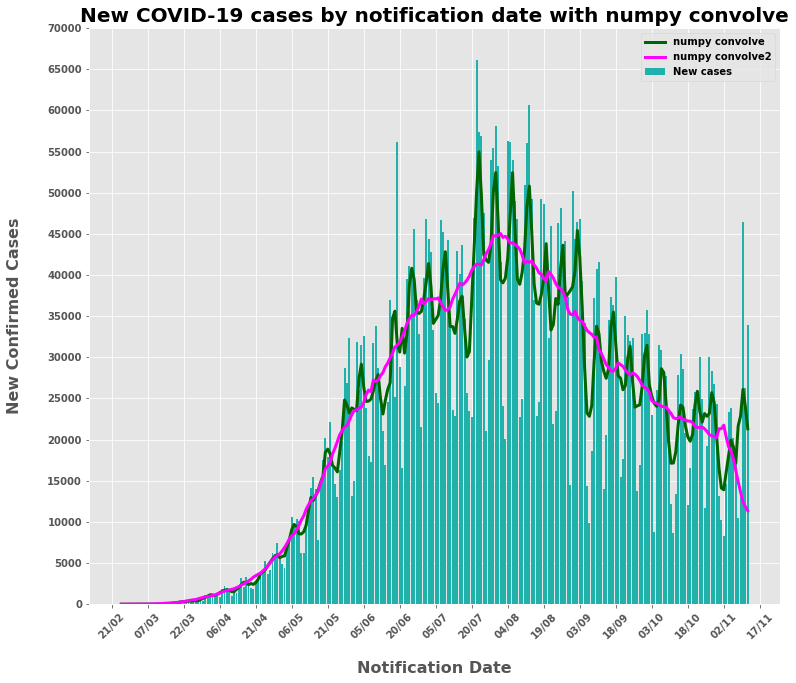

In [26]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

x = df_s_d.index
y =  df_s_d['new_confirmed']

# two moving average with time delta of 5 and 21
def smoothing(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

ax.bar(df_s_d.index, df_s_d['new_confirmed'], color='lightseagreen', label='New cases')
ax.plot(df_s_d.index, smoothing(df_s_d['new_confirmed'],5), color='darkgreen', label='numpy convolve', lw=3)
ax.plot(df_s_d.index, smoothing(df_s_d['new_confirmed'],21), color='magenta', label='numpy convolve2', lw=3)

ax.set_title('New COVID-19 cases by notification date with numpy convolve', size=20, weight='bold')
plt.xlabel('Notification Date', fontsize=16, labelpad=20., weight='bold')
plt.ylabel('New Confirmed Cases', fontsize=16, labelpad=25., weight='bold')

# date formatting
ax.xaxis.set_major_formatter(dates.DateFormatter('%d/%m'))
ax.xaxis.set_major_locator(dates.DayLocator(interval=15))
fig.autofmt_xdate(rotation = 45, ha = 'center')

plt.yticks(np.arange(df_s_d['new_confirmed'].min(), df_s_d['new_confirmed'].max()+5000, 5000))
plt.legend()

plt.savefig('New COVID-19 cases by notification date with numpy convolve.png', bbox_inches='tight')
plt.show()

# Calculate and plot the COVID-19 incidence coefficient for the state of São Paulo. See the plot below for reference.

**The brazil cities were really much, the graph will be crowded, so I plotted for the Brazil states**

In [27]:
# summing up the incidence coefficient for each state over the whole time period
df_ss = df_s.groupby(['state']).sum()
# removing state from being index
df_ss = df_ss.reset_index()
# picking the needed columns
df_ss = df_ss[['state', 'last_available_confirmed_per_100k_inhabitants']].copy()

# Sorting data in descending order
df_ss = df_ss.sort_values(by="last_available_confirmed_per_100k_inhabitants", ascending=False, key=abs)
df_ss

,state,last_available_confirmed_per_100k_inhabitants
21,RR,965941.78215
3,AP,758417.47192
6,DF,715995.91378
2,AM,454203.25621
26,TO,441009.13820
20,RO,428467.54176
24,SE,420047.29133
0,AC,413228.28045
7,ES,401062.24048
14,PB,372761.21448


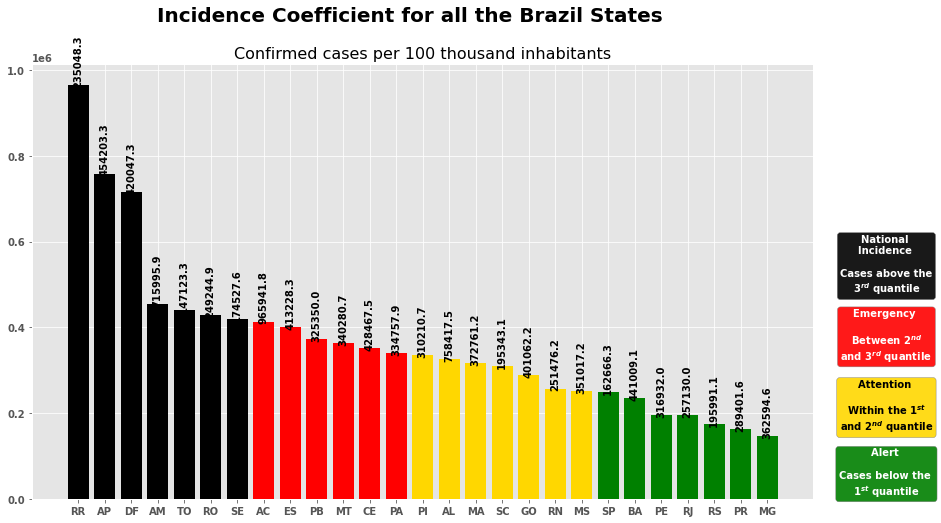

In [28]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import numpy as np
params = {'tex.usetex': True}
plt.style.use('ggplot')

fig, ax = plt.subplots(1,1, figsize=(14,8))

# classifying the bars and their colors by their quantiles
IC = df_ss['last_available_confirmed_per_100k_inhabitants']
q1 = IC.quantile(0.25); color1 = IC <= q1;
q2 = IC.quantile(0.5);  color2 = IC <=  q2;
q3 = IC.quantile(0.75); color3 = IC <=  q3;
q4 = IC.quantile(1.);   color4 = IC <=  q4;

# plot
plot4 = ax.bar(df_ss['state'][color4], IC[color4], color='black')
plot3 = ax.bar(df_ss['state'][color3], IC[color3], color='red')
plot2 = ax.bar(df_ss['state'][color2], IC[color2], color='gold')
plot1 = ax.bar(df_ss['state'][color1], IC[color1], color='green')

fig.suptitle('Incidence Coefficient for all the Brazil States', fontsize=20, weight='bold')
ax.set_title('Confirmed cases per 100 thousand inhabitants', size=16)

# text on the map
bbox_props = dict(boxstyle="round", fc="green", ec="0.5", alpha=0.9)
ax.text(30.5, 60000, "Alert \n\nCases below the \n$1^{st}$ quantile", ha="center", va="center", size=10,
        color="white", bbox=bbox_props)
bbox_props2 = dict(boxstyle="round", fc="gold", ec="0.5", alpha=0.9)
ax.text(30.5, 215000, "Attention \n\nWithin the $1^{st}$ \nand $2^{nd}$ quantile", ha="center", va="center", size=10, 
        color="black", bbox=bbox_props2)
bbox_props3 = dict(boxstyle="round", fc="red", ec="0.5", alpha=0.9)
ax.text(30.5, 380000, "Emergency \n\nBetween $2^{nd}$\nand $3^{rd}$ quantile", ha="center", va="center", size=10,
        color="white", bbox=bbox_props3)
bbox_props4 = dict(boxstyle="round", fc="black", ec="0.5", alpha=0.9)
ax.text(30.5, 545000, "National \nIncidence \n\nCases above the\n$3^{rd}$ quantile", ha="center", va="center", size=10,
        color="white", bbox=bbox_props4)

# text on each bar
for i, txt in enumerate(IC):
    plt.annotate(np.around(txt, 1), (df_ss['state'][i], IC[i]), ha='center', rotation=90)

plt.savefig('Incidence Coefficient for Brazil States.png', bbox_inches='tight')
plt.show()

# Dr. Luciana F. Tessarolo has been working on the development of an oil spill model in oceans. To validate her model, she collected oil spill data published in scientific articles. Make a script to read and plot the modeled data ("oureqhidpuro_2.txt") and the data found in articles ("curveeqhid_purewater_2"). Then calculate the correlation and the correlation coefficient between these variables. See the plots below for reference.

## Data found in articles

In [29]:
import pandas as pd
import re
column_1 = []
column_2 = []

with open('curvaeqhid_purewater_2.txt', 'r') as f:
    for line in f:
        list_line = re.findall(r'\d+\.', line)
        if len(list_line) == 2 :
            column_1.append(float(list_line[0])) #appends first column
            column_2.append(float(list_line[1])) #appends second column

# print(column_1)
# print(column_2)
data_p = pd.DataFrame(list(zip(column_1, column_2)), columns = ['Pressure','Temperature'])

data_p

,Pressure,Temperature
0,2.0,273.0
1,2.0,274.0
2,3.0,275.0
3,3.0,275.0
4,3.0,275.0
...,...,...
103,3.0,276.0
104,17.0,290.0
105,25.0,293.0
106,34.0,295.0


## The modeled data

In [30]:
import pandas as pd
import re
columns_1 = []
columns_2 = []
# columns_3 = []

with open('nossoeqhidpuro_2.txt', 'r') as f:
    for line in f:
        list_line = re.findall(r'\d+\.', line)
        if len(list_line) == 3 :
            columns_1.append(float(list_line[0])) #appends first column
            columns_2.append(float(list_line[1])) #appends second column
#             columns_3.append(float(list_line[2])) #appends third column

# print(columns_1)
# print(columns_2)
# print(columns_3)
data_m = pd.DataFrame(list(zip(columns_2, columns_1)), columns = ['Pressure','Temperature'])

data_m

,Pressure,Temperature
0,0.0,236.0
1,1.0,264.0
2,2.0,271.0
3,3.0,275.0
4,4.0,278.0
...,...,...
75,75.0,302.0
76,76.0,302.0
77,77.0,302.0
78,78.0,302.0


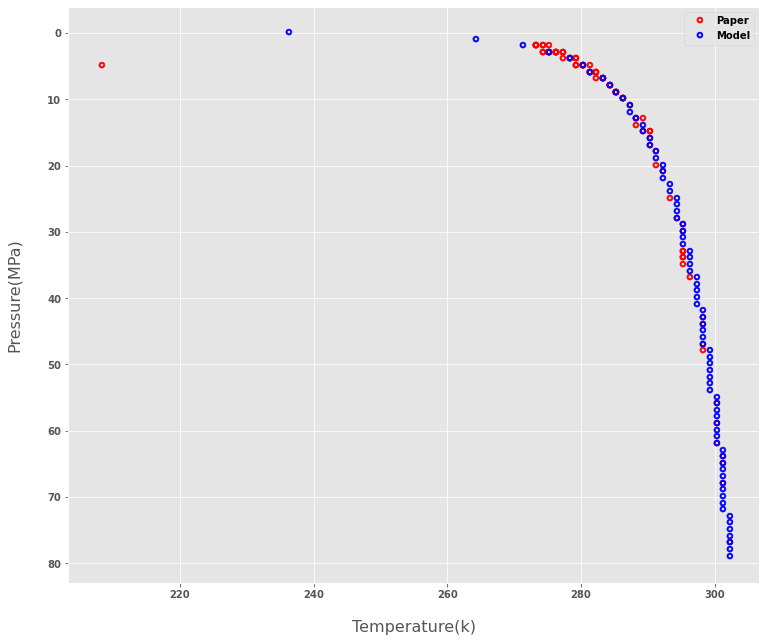

In [31]:
import matplotlib.pyplot as plt
import numpy as np
params = {'tex.usetex': True}
plt.style.use('ggplot')

fig = plt.figure(figsize=(12,10))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
plt.rcParams['figure.figsize'] = [8,6]
plt.rcParams["font.weight"] = "bold"


ax.scatter(data_p['Temperature'], data_p['Pressure'], s=80, c='red', marker=r'$\circ$', label='Paper')
ax.scatter(data_m['Temperature'], data_m['Pressure'], s=80, c='blue', marker=r'$\circ$', label='Model')
ax.invert_yaxis()

plt.xlabel('Temperature(k)', fontsize=16, labelpad=20.)
plt.ylabel('Pressure(MPa)', fontsize=16, labelpad=25.)
plt.legend()

plt.savefig('development of an oil spill model in oceans.png', bbox_inches='tight')
plt.show()

The data are of different sizes, below I attempted to remove values beyond row 80, since they don't have a significant impact on the Range of the values

In [32]:
a = data_p['Pressure'][:80]
a = a.sort_values()
data3 = pd.DataFrame(list(zip(a, data_m['Pressure'])), columns = ['Data','Model'])
data3

,Data,Model
0,2.0,0.0
1,2.0,1.0
2,2.0,2.0
3,2.0,3.0
4,2.0,4.0
...,...,...
75,62.0,75.0
76,64.0,76.0
77,65.0,77.0
78,68.0,78.0


/home/dorcas/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 81.0)

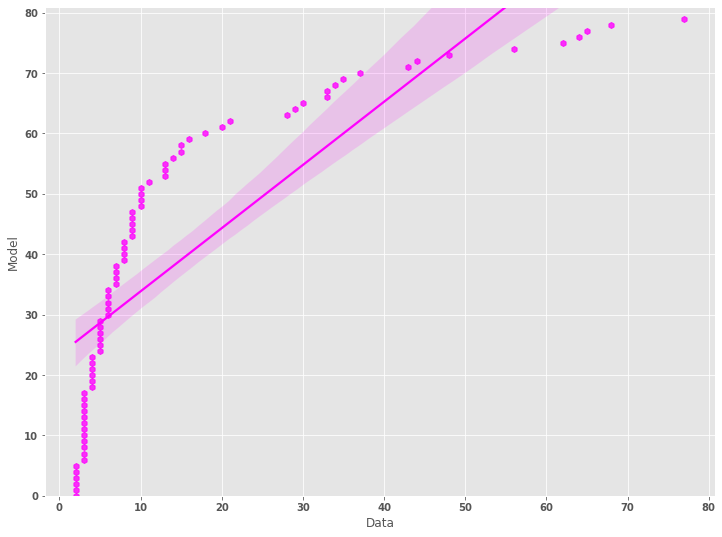

In [33]:
import seaborn as sns
from scipy import stats
fig, ax = plt.subplots(figsize =(12, 9))

ax = sns.regplot(data3['Data'], data3['Model'], data = data3, color='magenta', marker='h')
# correlation
pearson_coef, p_value = stats.pearsonr(data3["Data"], data3["Model"])
ax.set_ylim(0,81)

# THANK YOU!!!

# References:

https://scentellegher.github.io/programming/2017/07/15/pandas-groupby-multiple-columns-plot.html

https://www.delftstack.com/howto/python/smooth-data-in-python/